1D first example

In [17]:
import numpy as np

In [18]:
#define the shape of the environment (i.e., its states)
environment_shape = 6


#Create a 2D numpy array to hold the current Q-values for each state and action pair: Q(s, a)
#each state (see next cell for a description of possible actions).
#The value of each (state, action) pair is initialized to 0.
q_values = np.zeros((environment_shape,2))
print(q_values)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [19]:
#define actions
#numeric action codes: 0 = right , 1 = left
actions = ['right','left']

In [20]:
#Create a 1D numpy array to hold the rewards for each state.
rewards = np.full(6, -0.01)
rewards[0] = -1. #set the reward for trap to -1
rewards[5] = 1. #set the reward for goal to 1

print(rewards)

[-1.   -0.01 -0.01 -0.01 -0.01  1.  ]


In [21]:
#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_index):
  if rewards[current_index] == -0.01:
    return False
  else:
    return True


#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon,
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_index])
  else: #choose a random action
    return np.random.randint(2)

#define a function that will get the next location based on the chosen action
def get_next_location(current_index, action_index):
  new_index = current_index
  if actions[action_index] == 'right' and current_index > 0:
    new_index -= 1
  elif actions[action_index] == 'left' and current_index < 5:
    new_index += 1
  return new_index


def get_shortest_path(start_player_index):
  if is_terminal_state(start_player_index):
    return []
  else:
    current_player_index = start_player_index
    shortest_path = []
    shortest_path.append([current_player_index])
    while not is_terminal_state(current_player_index):
      action_index = get_next_action( current_player_index, 1.)
      current_player_index = get_next_location(current_player_index, action_index)
      shortest_path.append([current_player_index])
    return shortest_path

In [22]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

#run through 1000 training episodes
for episode in range(1000):
  #get the starting location for this episode
  player_index = 2

  #continue taking actions (i.e., moving) until we reach a terminal state
  while not is_terminal_state(player_index):
    #choose which action to take (i.e., where to move next)
    action_index = get_next_action(player_index, epsilon)

    #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_player_index = player_index #store the old row and column indexes
    player_index = get_next_location(player_index, action_index)

    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[player_index]
    old_q_value = q_values[old_player_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[player_index])) - old_q_value

    #update the Q-value for the previous state and action pair
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_player_index, action_index] = new_q_value
print(q_values)
print('Training complete!')

[[ 0.       0.     ]
 [-0.9999   0.7019 ]
 [ 0.62171  0.791  ]
 [ 0.7019   0.89   ]
 [ 0.791    1.     ]
 [ 0.       0.     ]]
Training complete!


In [23]:
#example of location to test the behavior
print(get_shortest_path(2))

[[2], [3], [4], [5]]


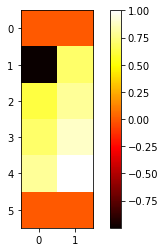

In [24]:
#plot the Q-values
import matplotlib.pyplot as plt
plt.imshow(q_values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



2D Toy example

In [25]:
#define the shape of the environment (i.e., its states)
environment_rows = 3
environment_columns = 4


q_values = np.zeros((environment_rows, environment_columns, 4))

print(q_values)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [26]:
#define actions
#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

In [27]:
#Create a 2D numpy array to hold the rewards for each state.
rewards = np.full((environment_rows, environment_columns), -0.04)
rewards[0, 3] = 1. #set the reward for the goal (i.e., the goal) to 1
rewards[1, 3] = -1. #set the reward for the trap to -1
rewards[1,1] = -1. #set the reward for the block to -1

#print rewards matrix
print(rewards)

[[-0.04 -0.04 -0.04  1.  ]
 [-0.04 -1.   -0.04 -1.  ]
 [-0.04 -0.04 -0.04 -0.04]]


In [28]:
#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
  if rewards[current_row_index, current_column_index] == -0.04:
    return False
  else:
    return True


def set_starting_location():
  return 2, 0

def get_next_action(current_row_index, current_column_index, epsilon):
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else:
    return np.random.randint(4)

def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index > 0:
    new_column_index -= 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index < environment_columns - 1:
    new_column_index += 1
  return new_row_index, new_column_index


def get_shortest_path(start_row_index, start_column_index):
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else:
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    while not is_terminal_state(current_row_index, current_column_index):
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path

In [29]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

#run through 1000 training episodes
for episode in range(1000):
  #get the starting location for this episode
  row_index, column_index = set_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  while not is_terminal_state(row_index, column_index):
    #choose which action to take (i.e., where to move next)
    action_index = get_next_action(row_index, column_index, epsilon)

    #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)

    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    #update the Q-value for the previous state and action pair
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row_index, old_column_index, action_index] = new_q_value
print(q_values)
print('Training complete!')

[[[ 0.62059993  0.62059926  0.51791761  0.734     ]
  [ 0.73399197  0.6206     -0.999       0.86      ]
  [ 0.86        0.734       0.734       1.        ]
  [ 0.          0.          0.          0.        ]]

 [[ 0.6206      0.51853936  0.42663102 -0.99999999]
  [ 0.          0.          0.          0.        ]
  [ 0.86       -1.          0.6206     -1.        ]
  [ 0.          0.          0.          0.        ]]

 [[ 0.51854     0.426686    0.426686    0.51854   ]
  [-1.          0.426686    0.51854     0.6206    ]
  [ 0.734       0.51854     0.6206      0.51854   ]
  [-0.9         0.6206      0.45411593 -0.12570016]]]
Training complete!


In [30]:
#example of location to test the behavior
print(get_shortest_path(2, 0))
print(get_shortest_path(2, 3))

[[2, 0], [1, 0], [0, 0], [0, 1], [0, 2], [0, 3]]
[[2, 3], [2, 2], [1, 2], [0, 2], [0, 3]]
